In [28]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [2]:


predictor2file = {'airTemp':'tas.nc', 'precip':'pr.nc', 'downwardLongwave':'rlns.nc', \
                  'downwardShortwave':'rsds.nc', 'plantAvailableWater':'paw.nc'}
# where is relative humidity?
predictors = {k:Dataset(v)['var1'][...].squeeze() for k,v in predictor2file.items()}
targetFile = 'jedi_output.nc'
targetVariable = 'NPP'
target = Dataset( targetFile)[targetVariable][...].squeeze()
landSeaMask = Dataset('landsea.nc')['var1'][...].squeeze()

# an example of making annual means
precip = predictors['precip']
annualMeanPrecip = precip.reshape((-1, 12, precip.shape[1], precip.shape[2])).mean( axis=1)

print(np.shape(annualMeanPrecip))

In [2]:
airTemp = 'tas.nc'
netLongRadiantionFlux = 'rlns.nc'
shortwaveRadiation = 'rsds.nc'
precipitation = 'pr.nc'

output = 'jedi_output.nc'

landSeaMask = 'landsea.nc'
latitude =  'latitude.nc'
longitude = 'longitude.nc'
elevation = 'elevation.nc'
moisture = 'paw.nc'
spatialMetaData = 'globe_surf.nc'

airTempDataset = Dataset(airTemp)
netLongRadiantionFluxDataSet = Dataset(netLongRadiantionFlux)
shortwaveRadiationDataset = Dataset(shortwaveRadiation)
precipitationDataSet = Dataset(precipitation)
outputDataset = Dataset(output)

landSeaMaskDataset = Dataset(landSeaMask)
latitudeDataset = Dataset(latitude)
longitudeDataset = Dataset(longitude)
elevationDataset = Dataset(elevation)
moistureDataset = Dataset(moisture)
spatialMetaDataset = Dataset(spatialMetaData)

airTempArray = airTempDataset['var1'][:].squeeze()
netLongRadiantionFluxArray = netLongRadiantionFluxDataSet['var1'][:].squeeze()
shortwaveRadiationArray = shortwaveRadiationDataset['var1'][:].squeeze()
precipitationArray = precipitationDataSet['var1'][:].squeeze()
NPPArray = outputDataset['NPP'][:].squeeze()
landSeaMaskArray = landSeaMaskDataset['var1'][:].squeeze()
lantitudeArray = latitudeDataset['var1'][:].squeeze()
longitudeArray = longitudeDataset['var1'][:].squeeze()
elevationArray = elevationDataset['var1'][:].squeeze()
moistureArray = moistureDataset['var1'][:].squeeze()
spatialMetaDataArray = spatialMetaData[:]



In [8]:

print(np.shape(NPPArray))


51


In [3]:
def getAnnualAverage(inputArray, n):
    avgResult = np.average(inputArray.reshape(-1, n), axis=1)
    return avgResult

In [17]:
def getAnnualAndFlatten(input, n):
    result = list()
    y = np.shape(input)[1]
    z = np.shape(input)[2]
    for i in range(y):
        for j in range(z):
            temp = getAnnualAverage(input[:, i, j], n)
            result.append(temp)
    
    result = np.stack(result)

    return result

In [18]:
airTempArray1 = getAnnualAverage(airTempArray[:, 25, 25], 12)
netLongRadiantionFluxArray1 = getAnnualAverage(netLongRadiantionFluxArray[:, 25, 25], 12)
shortwaveRadiationArray1 = getAnnualAverage(shortwaveRadiationArray[:, 25, 25], 12)
precipitationArray1 = getAnnualAverage(precipitationArray[:, 25, 25], 12)

NPPArray1 = getAnnualAverage(NPPArray[:, 25, 25], 12)
NPPAnnualArray = getAnnualAndFlatten(NPPArray, 12)



In [19]:
print(np.shape(NPPAnnualArray))


(3060, 24)


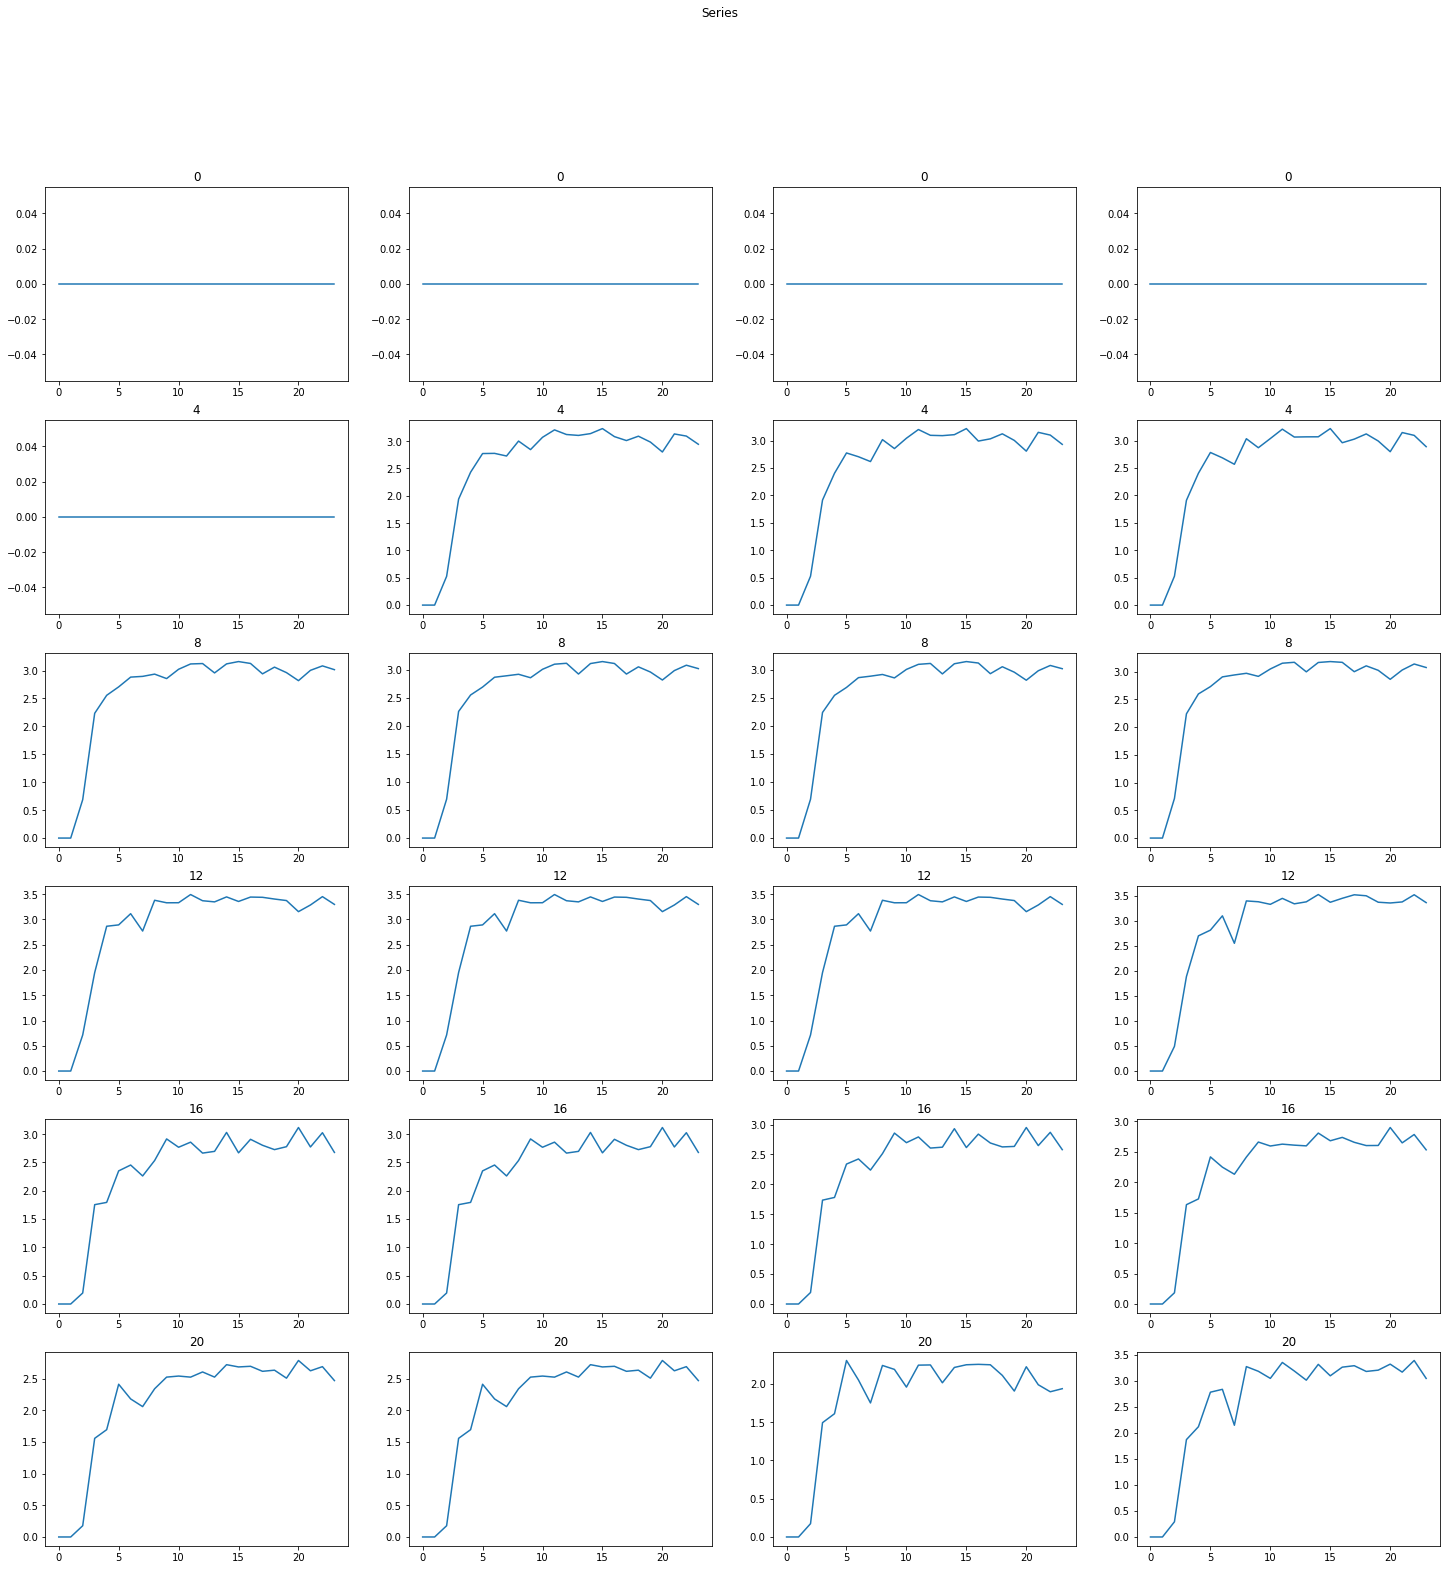

In [23]:
fig, axs = plt.subplots(6,4,figsize=(25,25))
fig.suptitle('Series')
for i in range(6):
    for j in range(4):
        if i*4+j+1>len(NPPAnnualArray): # pass the others that we can't fill
            continue
        axs[i, j].plot(NPPAnnualArray[i*4+j])
        axs[i, j].set_title(i*4+j)
plt.show()

In [25]:
cluster_count = math.ceil(math.sqrt(len(NPPAnnualArray))) 
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw")

labels = km.fit_predict(NPPAnnualArray)

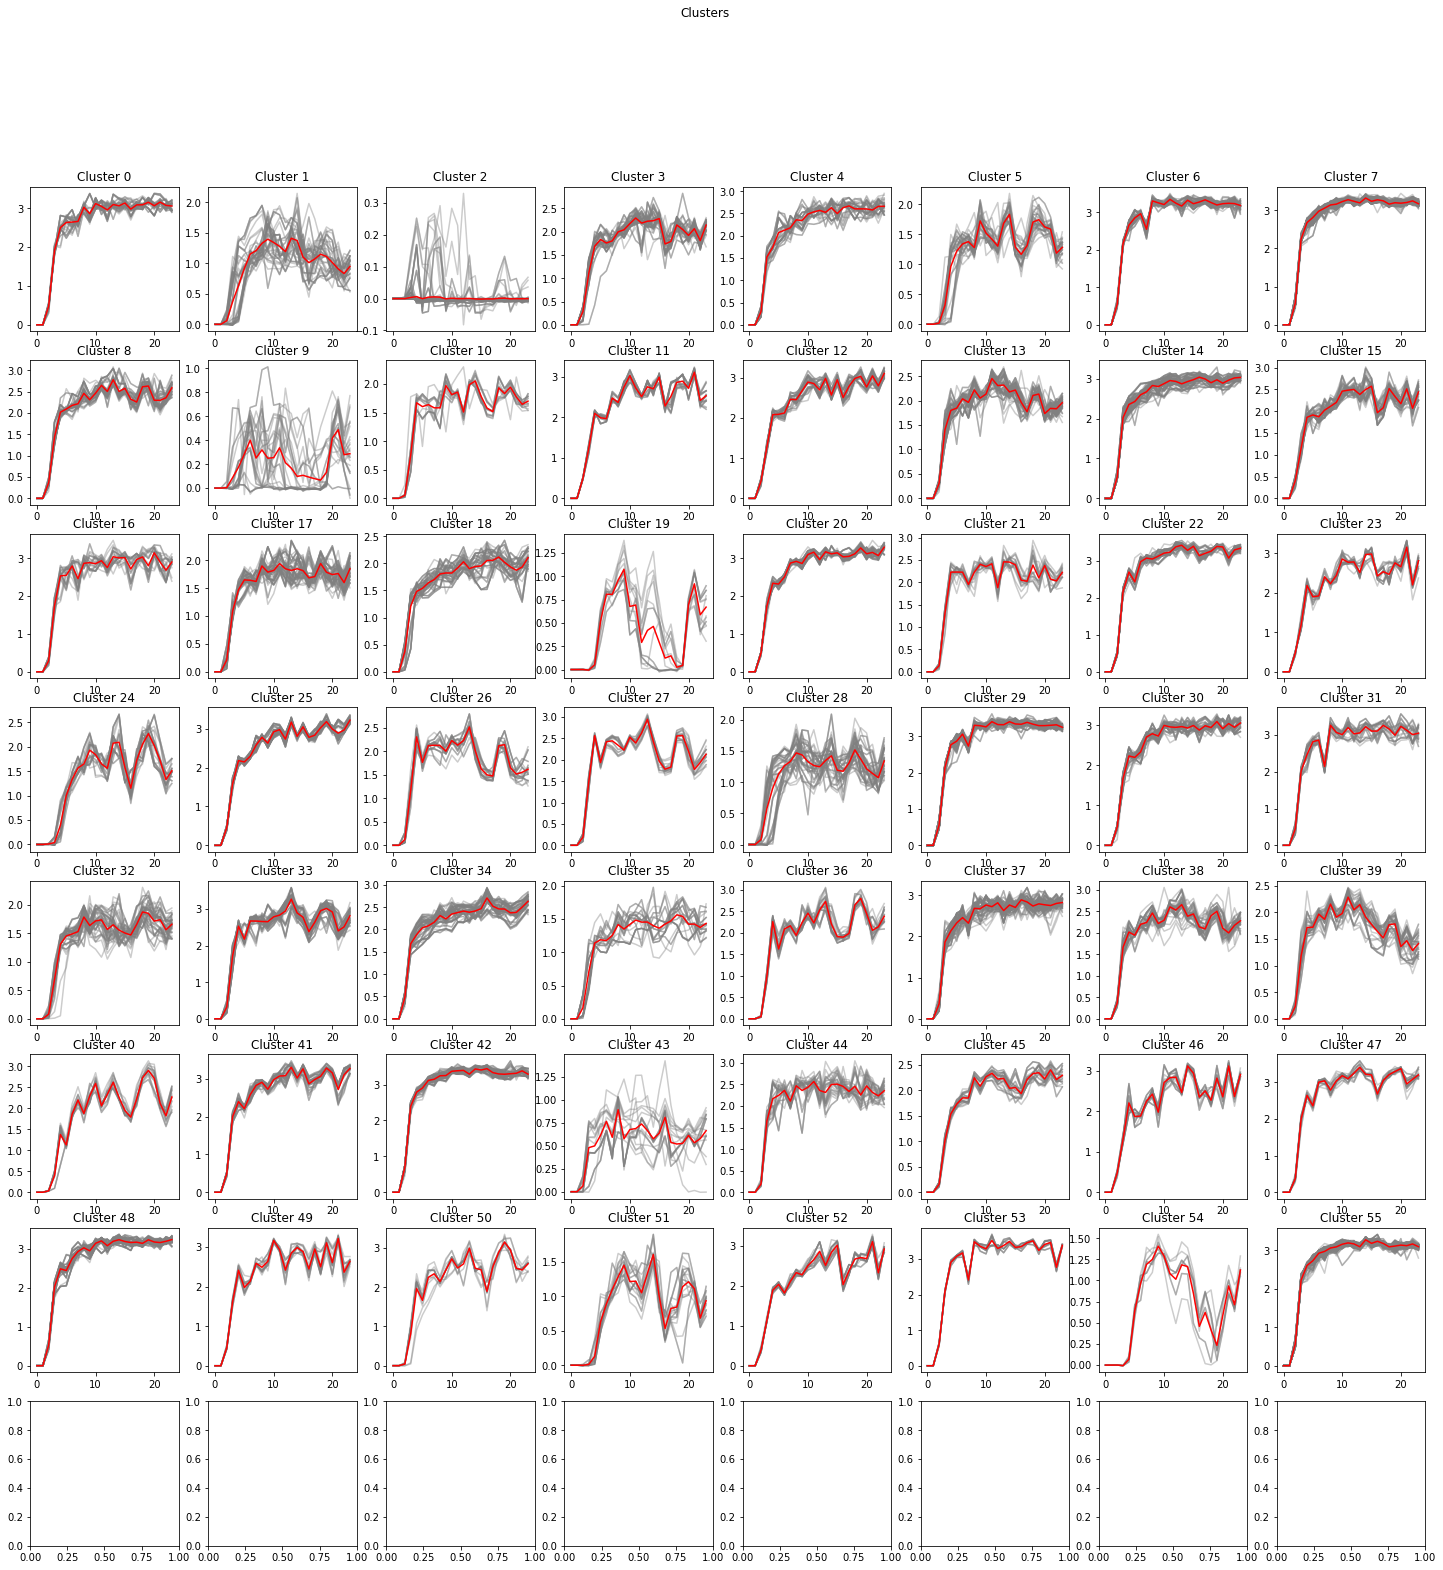

In [27]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []

    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(NPPAnnualArray[i],c="gray",alpha=0.4)
                cluster.append(NPPAnnualArray[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i * plot_count +column_j))
1
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

In [ ]:
def doRandomForrestRegression(input, yLength):
    x = input[0:len(input)-yLength]
    y = input[len(input)-yLength:len(input)]
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=1)


In [11]:
DataArray = np.transpose(np.stack((airTempArray1, netLongRadiantionFluxArray1, shortwaveRadiationArray1, precipitationArray1)))
print(np.shape(DataArray))

(24, 4)


In [ ]:
airTrain1, xTest1, yTrain1, yTest1 = train_test_split(x1, y1, test_size = 0.3, random_state = 1)
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(x2, y2, test_size = 0.3, random_state = 1)
xTrain3, xTest3, yTrain3, yTest3 = train_test_split(x3, y3, test_size = 0.3, random_state = 1)
print("x dimension :", np.shape(x1))
print("y dimension :", np.shape(y1))

print("xTrain dimension :", np.shape(xTrain1))
print("yTrain dimension :", np.shape(yTrain1))

print("xTest dimension :", np.shape(xTest1))
print("yTest dimension :", np.shape(yTest1))

In [26]:
print(airTempDataset)
for dm in airTempDataset.dimensions.values() :
    print(dm)

print(airTempDataset['var1'])



print(np.shape(airTempArray))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.8 (https://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    history: Tue Jun 14 10:29:59 2022: ncks -4 -L4 -O tas.nc tas.nc
Wed Jun 08 09:48:43 2022: cdo -r -f nc copy tas.srv tas.nc
    CDO: Climate Data Operators version 1.9.8 (https://mpimet.mpg.de/cdo)
    NCO: netCDF Operators version 4.9.1 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    dimensions(sizes): lev(1), time(288), y(51), x(60)
    variables(dimensions): float64 lev(lev), float64 time(time), float64 var1(time, lev, y, x)
    groups: 
<class 'netCDF4._netCDF4.Dimension'>: name = 'lev', size = 1
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 288
<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 51
<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 60
<class 'netCDF4._netCDF4.Variable'>
float64 var1(time, lev, y, x)
unlimited dimensions: ti

In [20]:
print(netLongRadiantionFluxDataSet)
for dm in netLongRadiantionFluxDataSet.dimensions.values() :
    print(dm)

print(netLongRadiantionFluxDataSet['var1'])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.8 (https://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    history: Tue Jun 14 10:29:58 2022: ncks -4 -L4 -O rlns.nc rlns.nc
Wed Jun 08 09:48:42 2022: cdo -r -f nc copy rlns.srv rlns.nc
    CDO: Climate Data Operators version 1.9.8 (https://mpimet.mpg.de/cdo)
    NCO: netCDF Operators version 4.9.1 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    dimensions(sizes): time(288), y(51), x(60)
    variables(dimensions): float64 time(time), float64 var1(time, y, x)
    groups: 
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 288
<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 51
<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 60
<class 'netCDF4._netCDF4.Variable'>
float64 var1(time, y, x)
unlimited dimensions: time
current shape = (288, 51, 60)
filling on, default _FillValue of 9.969209968386869e+36 used

In [15]:
print(shortwaveRadiationDataset)
for dm in shortwaveRadiationDataset.dimensions.values() :
    print(dm)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.8 (https://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    history: Tue Jun 14 10:29:58 2022: ncks -4 -L4 -O rsds.nc rsds.nc
Wed Jun 08 09:48:43 2022: cdo -r -f nc copy rsds.srv rsds.nc
    CDO: Climate Data Operators version 1.9.8 (https://mpimet.mpg.de/cdo)
    NCO: netCDF Operators version 4.9.1 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    dimensions(sizes): time(288), y(51), x(60)
    variables(dimensions): float64 time(time), float64 var1(time, y, x)
    groups: 
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 288
<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 51
<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 60


In [16]:
print(precipitationDataSet)
for dm in precipitationDataSet.dimensions.values() :
    print(dm)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.8 (https://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    history: Tue Jun 14 10:29:58 2022: ncks -4 -L4 -O pr.nc pr.nc
Wed Jun 08 09:48:42 2022: cdo -r -f nc copy pr.srv pr.nc
    CDO: Climate Data Operators version 1.9.8 (https://mpimet.mpg.de/cdo)
    NCO: netCDF Operators version 4.9.1 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    dimensions(sizes): time(288), y(51), x(60)
    variables(dimensions): float64 time(time), float64 var1(time, y, x)
    groups: 
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 288
<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 51
<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 60


In [24]:
print(outputDataset)
for dm in outputDataset.dimensions.values() :
    print(dm)

print(outputDataset['NPP'])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.8 (https://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    history: Tue Jun 14 10:29:50 2022: ncks -4 -L4 -O jedi_output.nc jedi_output.nc
Wed Jun 08 09:53:36 2022: cdo -f nc -t jedi_partab ifthen landsea.nc -setgrid,landsea.nc jedi_output.srv jedi_output.nc
Wed Jun 08 09:48:42 2022: cdo -r -f nc copy landsea.srv landsea.nc
    CDO: Climate Data Operators version 1.9.8 (https://mpimet.mpg.de/cdo)
    NCO: netCDF Operators version 4.9.1 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    dimensions(sizes): time(288), y(51), x(60)
    variables(dimensions): float32 AR(time, y, x), float32 ASSMC(time, y, x), float32 ASSMC_LOSS(time, y, x), float32 BM(time, y, x), float32 BUCKET(time, y, x), float32 CWDC(time, y, x), float32 CWDC_LOSS(time, y, x), float32 ER(time, y, x), float32 ESOIL(time, y, x), float32 ET(time, y, x), float32 EVEN(time, y, x),